### 02/05/25

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visadataset_df=pd.read_csv(r'C:\Users\Admin\Downloads\visadataset.csv')
visadataset_df
cat=visadataset_df.select_dtypes(include='object').columns
num=visadataset_df.select_dtypes(exclude='object').columns

In [4]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Histogram**

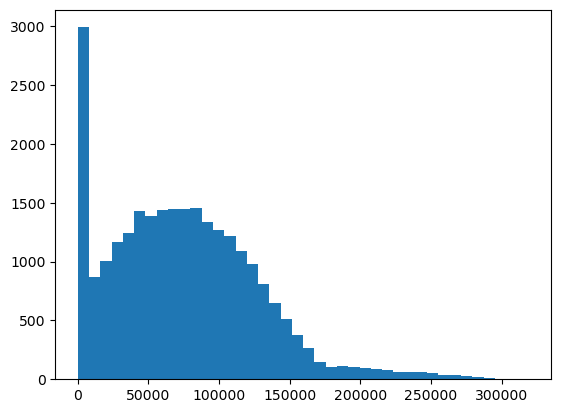

In [6]:
wage_data=visadataset_df['prevailing_wage']
plt.hist(wage_data,bins=40)
plt.show()

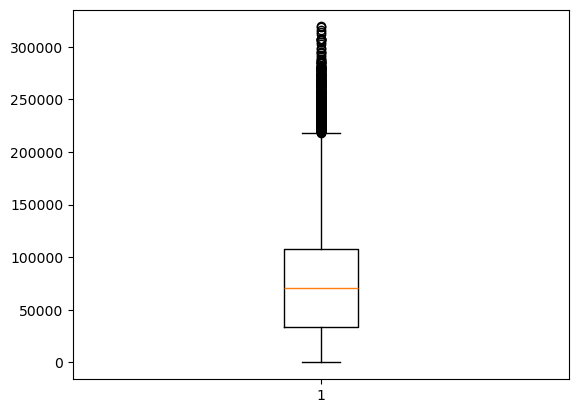

In [7]:
plt.boxplot(wage_data)
plt.show()

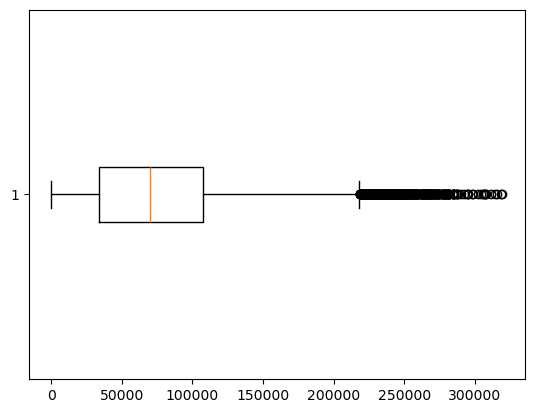

In [8]:
plt.boxplot(wage_data,vert=False)
plt.show()

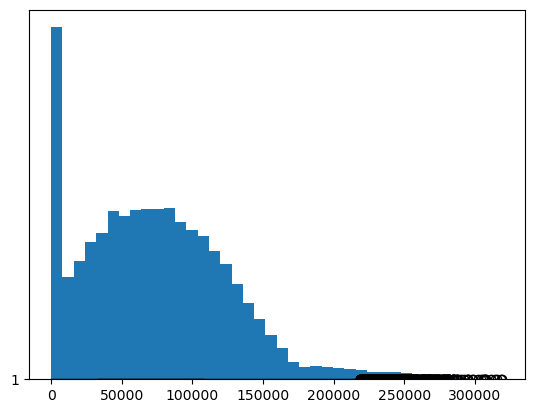

In [9]:
plt.subplot().hist(wage_data,bins=40)
plt.subplot().boxplot(wage_data,vert=False)
plt.show()

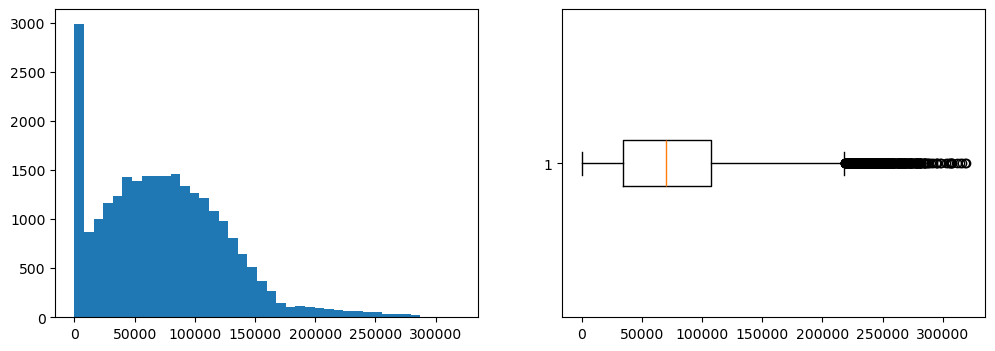

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1).hist(wage_data,bins=40)
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.show()

<Axes: ylabel='prevailing_wage'>

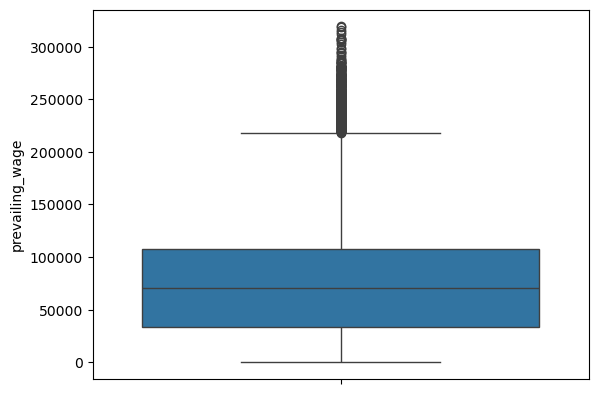

In [11]:
sns.boxplot(wage_data)

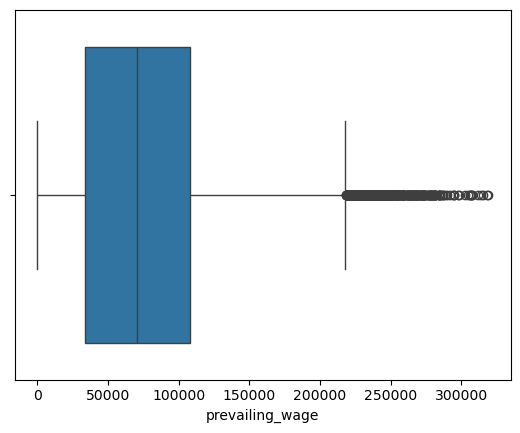

In [12]:
sns.boxplot(wage_data,orient='h')
plt.show()

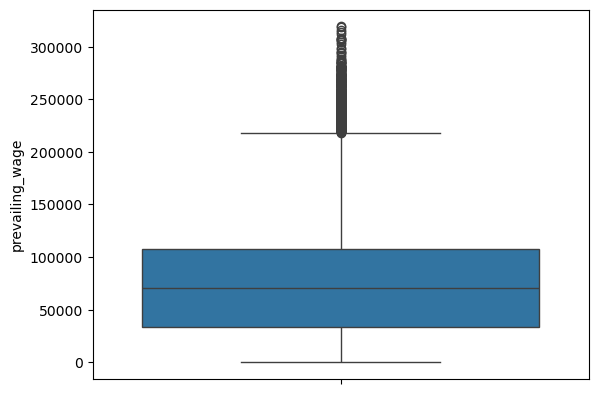

In [13]:
sns.boxplot(wage_data,orient='b')
plt.show()

- Find the number of outliers
- Get outliers data and with out data separate

In [14]:
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
con1=wage_data<lower_bound
con2=wage_data>upper_bound
con=con1 | con2
outliers_data=visadataset_df[con]
len(visadataset_df[con])

427

In [15]:
outliers_data=visadataset_df[con]
outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [63]:
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
con1=wage_data>lower_bound
con2=wage_data<upper_bound
con=con1 & con2
non_outliers_data=visadataset_df[con]
len(visadataset_df[con])

25053

In [64]:
25053+427

25480

In [65]:
427/25480*100

1.6758241758241759

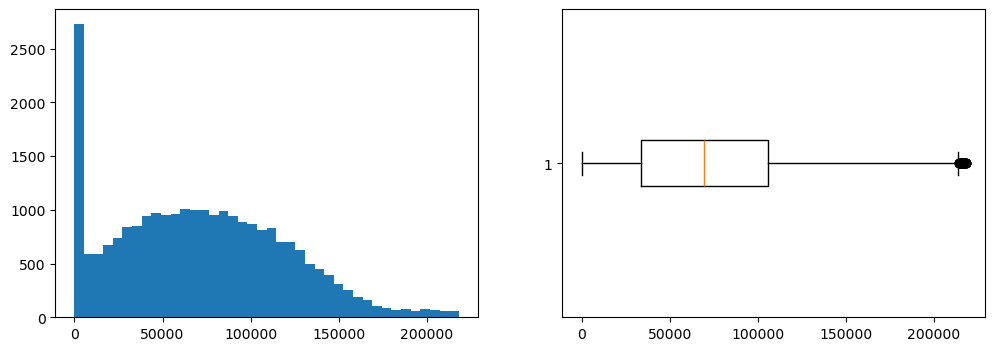

In [66]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'],bins=40)
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'],vert=False)
plt.show()

**fill the ouliers with median**

In [67]:
# visa_df : 25480
# non_outlier_data : 25053
# outliers_df : 427

wage_data=visadataset_df['prevailing_wage'].values
wage_data_outliers=outliers_data['prevailing_wage'].values

In [19]:
wage_data=visadataset_df['prevailing_wage'].values
wage_data_outliers=outliers_data['prevailing_wage'].values
wage_median=np.median(wage_data)
list1=[]
for i in wage_data:
    if i in wage_data_outliers:
        list1.append(wage_median)
    else:
        list1.append(i)

visadataset_df['prevailing_wage_x']=list1
visadataset_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_x
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


In [18]:
wage_data=visadataset_df['prevailing_wage'].values
wage_data_outliers=outliers_data['prevailing_wage'].values
wage_median=visadataset_df['prevailing_wage'].median()
list1=[]
for i in wage_data:
    if i in wage_data_outliers:
        list1.append(wage_median)
    else:
        list1.append(i)
visadataset_df['prevailing_wage_x']=list1
visadataset_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_x
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


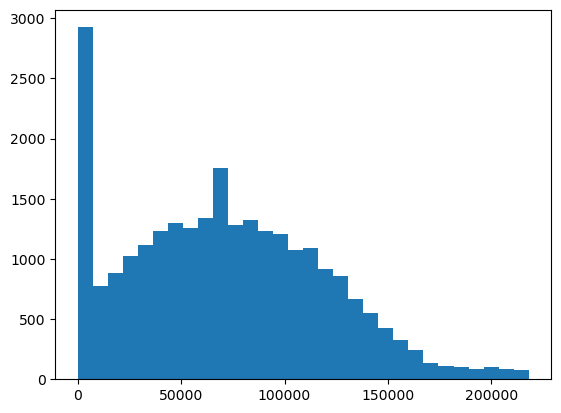

In [45]:
plt.hist(visadataset_df['prevailing_wage'],bins=30)
plt.show()

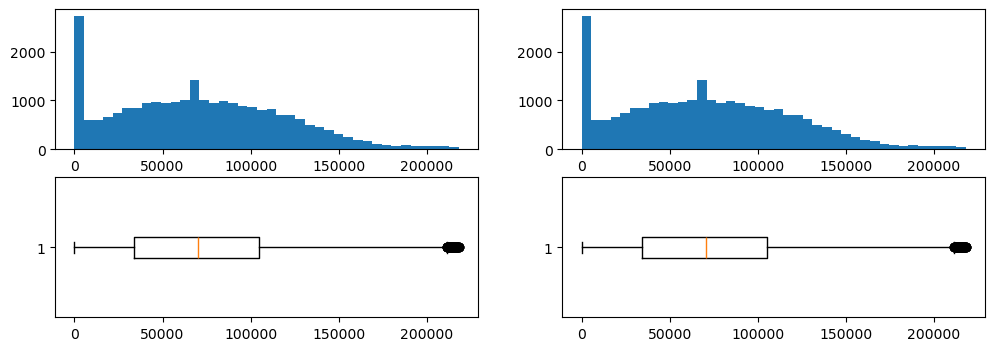

In [47]:
plt.figure(figsize=(12,4))
plt.subplot(2,2,1).hist(visadataset_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).hist(visadataset_df['prevailing_wage'],bins=40)
plt.subplot(2,2,3).boxplot(visadataset_df['prevailing_wage'],vert=False)
plt.subplot(2,2,4).boxplot(visadataset_df['prevailing_wage'],vert=False)
plt.show()